In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('cardio_train.xlsx')
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69296,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69297,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69298,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69299,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


### Exploratory Data Analysis

In [3]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [4]:
data.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69296,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69297,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69298,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69299,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69300,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


#### Lets check the null values without using visualization

In [5]:
data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

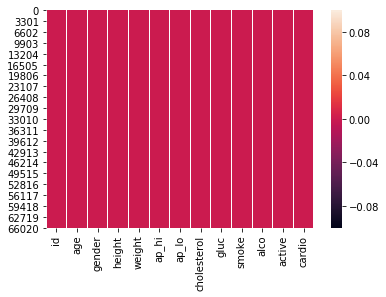

In [6]:
#Check the Null value through graph
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(data.isnull())
plt.show()

In [7]:
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69296,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69297,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69298,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69299,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [8]:
np.all(np.isfinite(data))

True

In [9]:
data.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [10]:
data = pd.DataFrame(data=data)
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69296,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69297,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69298,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69299,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [11]:
data.shape

(69301, 13)

In [12]:
data.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [13]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
dfcor = data.corr()
dfcor

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003587,0.003773,-0.003735,-0.001549,0.003268,-0.002757,0.006400,0.002543,-0.003294,0.000384,0.002700,0.004269
age,0.003587,1.000000,-0.023150,-0.081304,0.054409,0.020663,0.017717,0.154343,0.099095,-0.047680,-0.029435,-0.009926,0.238095
gender,0.003773,-0.023150,1.000000,0.499373,0.155649,0.005980,0.015396,-0.036335,-0.021154,0.337608,0.171015,0.006241,0.008592
height,-0.003735,-0.081304,0.499373,1.000000,0.290333,0.005492,0.006215,-0.050632,-0.018929,0.187899,0.094164,-0.005974,-0.011015
weight,-0.001549,0.054409,0.155649,0.290333,1.000000,0.030665,0.043652,0.141901,0.107255,0.068304,0.067259,-0.016514,0.182094
ap_hi,0.003268,0.020663,0.005980,0.005492,0.030665,1.000000,0.015919,0.023573,0.011821,-0.000933,0.001385,0.000032,0.054211
ap_lo,-0.002757,0.017717,0.015396,0.006215,0.043652,0.015919,1.000000,0.024023,0.010895,0.004948,0.010764,0.004962,0.065290
cholesterol,0.006400,0.154343,-0.036335,-0.050632,0.141901,0.023573,0.024023,1.000000,0.451741,0.010237,0.036015,0.009708,0.220752
gluc,0.002543,0.099095,-0.021154,-0.018929,0.107255,0.011821,0.010895,0.451741,1.000000,-0.004608,0.011442,-0.007301,0.089062
smoke,-0.003294,-0.047680,0.337608,0.187899,0.068304,-0.000933,0.004948,0.010237,-0.004608,1.000000,0.339709,0.025794,-0.015225


#### Here Id is unnecessary so we are deleting this column

In [15]:
data.drop(['id'], axis = 1,inplace=True)

In [16]:
data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,23393,1,155,62.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69296,19240,2,168,76.0,120,80,1,1,1,0,1,0
69297,22601,1,158,126.0,140,90,2,2,0,0,1,1
69298,19066,2,183,105.0,180,90,3,1,0,1,0,1
69299,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [17]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


#### Lets again findout the correlation

In [18]:
dfcor = data.corr()
dfcor

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.023150,-0.081304,0.054409,0.020663,0.017717,0.154343,0.099095,-0.047680,-0.029435,-0.009926,0.238095
gender,-0.023150,1.000000,0.499373,0.155649,0.005980,0.015396,-0.036335,-0.021154,0.337608,0.171015,0.006241,0.008592
height,-0.081304,0.499373,1.000000,0.290333,0.005492,0.006215,-0.050632,-0.018929,0.187899,0.094164,-0.005974,-0.011015
weight,0.054409,0.155649,0.290333,1.000000,0.030665,0.043652,0.141901,0.107255,0.068304,0.067259,-0.016514,0.182094
ap_hi,0.020663,0.005980,0.005492,0.030665,1.000000,0.015919,0.023573,0.011821,-0.000933,0.001385,0.000032,0.054211
ap_lo,0.017717,0.015396,0.006215,0.043652,0.015919,1.000000,0.024023,0.010895,0.004948,0.010764,0.004962,0.065290
cholesterol,0.154343,-0.036335,-0.050632,0.141901,0.023573,0.024023,1.000000,0.451741,0.010237,0.036015,0.009708,0.220752
gluc,0.099095,-0.021154,-0.018929,0.107255,0.011821,0.010895,0.451741,1.000000,-0.004608,0.011442,-0.007301,0.089062
smoke,-0.047680,0.337608,0.187899,0.068304,-0.000933,0.004948,0.010237,-0.004608,1.000000,0.339709,0.025794,-0.015225
alco,-0.029435,0.171015,0.094164,0.067259,0.001385,0.010764,0.036015,0.011442,0.339709,1.000000,0.025745,-0.007217


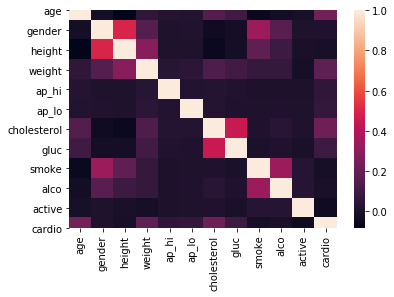

In [19]:
sns.heatmap(dfcor)

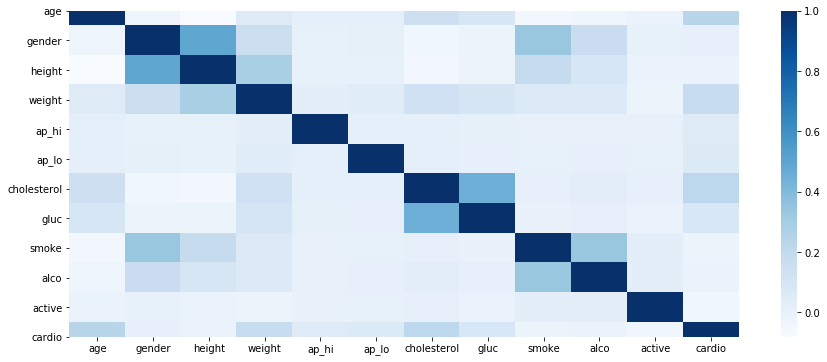

In [20]:
plt.figure(figsize=(15,6))
sns.heatmap(dfcor,cmap='Blues',annot=False)

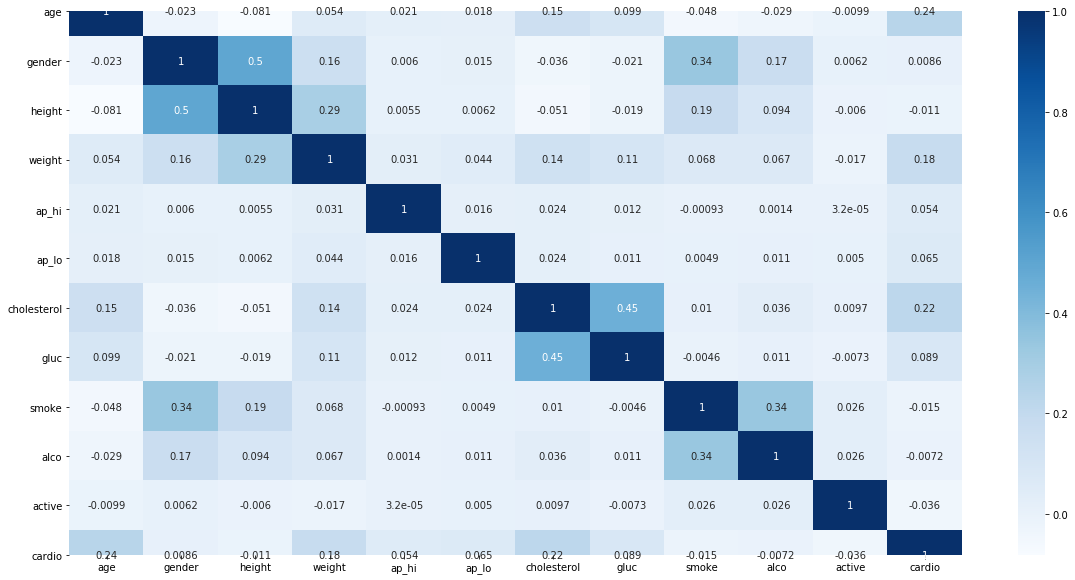

In [21]:
plt.figure(figsize=(20,10))
sns.heatmap(dfcor,cmap='Blues',annot=True)

#### Treatment of Outliers

In [22]:
#Lets check for outliers
from scipy.stats import zscore
z_score=abs(zscore(data))
print(data.shape)
data_final=data.loc[(z_score<3).all(axis=1)]
print(data_final.shape)

(69301, 12)
(55140, 12)


#### Checking Skewness and Removing it

In [23]:
#Check Skewness 
data.skew()
#there is some skewness which need to be treated,by seeing we can say only +ve skewness is significant and needs to be treated
#if value is 0.55 or more than that then there would be a skewed value

age            -0.307388
gender          0.631203
height         -0.634040
weight          1.005120
ap_hi          84.886144
ap_lo          32.101546
cholesterol     1.587480
gluc            2.397520
smoke           2.907579
alco            3.951845
active         -1.531525
cardio          0.001645
dtype: float64

In [24]:
def sigmoid(x):
    e = np.exp(1)
    y = 1/(1+e**(-x))
    return y
sigmoid1 = sigmoid(data.ap_hi)
sigmoid1.describe()

count    6.930100e+04
mean     9.998912e-01
std      1.015311e-02
min      7.175096e-66
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: ap_hi, dtype: float64

In [25]:
data["ap_hi"] = sigmoid1

In [26]:
data.skew()

age            -0.307388
gender          0.631203
height         -0.634040
weight          1.005120
ap_hi         -97.015877
ap_lo          32.101546
cholesterol     1.587480
gluc            2.397520
smoke           2.907579
alco            3.951845
active         -1.531525
cardio          0.001645
dtype: float64

#### Treating the Skewness Using Sigmoid

In [27]:
def sigmoid(x):
    e = np.exp(1)
    y = 1/(1+e**(-x))
    return y
sigmoid2 = sigmoid(data.ap_lo)
sigmoid2.describe()

count    6.930100e+04
mean     9.998301e-01
std      9.550007e-03
min      3.975450e-31
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: ap_lo, dtype: float64

In [28]:
data["ap_lo"] = sigmoid2

In [29]:
data.skew()

age            -0.307388
gender          0.631203
height         -0.634040
weight          1.005120
ap_hi         -97.015877
ap_lo         -60.327642
cholesterol     1.587480
gluc            2.397520
smoke           2.907579
alco            3.951845
active         -1.531525
cardio          0.001645
dtype: float64

In [30]:
def sigmoid(x):
    e = np.exp(1)
    y = 1/(1+e**(-x))
    return y
sigmoid3 = sigmoid(data.alco)
sigmoid3.describe()

count    69301.000000
mean         0.512450
std          0.052169
min          0.500000
25%          0.500000
50%          0.500000
75%          0.500000
max          0.731059
Name: alco, dtype: float64

In [31]:
data["alco"] = sigmoid3

In [32]:
data.skew()

age            -0.307388
gender          0.631203
height         -0.634040
weight          1.005120
ap_hi         -97.015877
ap_lo         -60.327642
cholesterol     1.587480
gluc            2.397520
smoke           2.907579
alco            3.951845
active         -1.531525
cardio          0.001645
dtype: float64

In [33]:
dfcor = data.corr()
dfcor

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.023150,-0.081304,0.054409,0.002431,-0.000856,0.154343,0.099095,-0.047680,-0.029435,-0.009926,0.238095
gender,-0.023150,1.000000,0.499373,0.155649,-0.004870,-0.002805,-0.036335,-0.021154,0.337608,0.171015,0.006241,0.008592
height,-0.081304,0.499373,1.000000,0.290333,0.002099,0.000302,-0.050632,-0.018929,0.187899,0.094164,-0.005974,-0.011015
weight,0.054409,0.155649,0.290333,1.000000,0.005621,0.007465,0.141901,0.107255,0.068304,0.067259,-0.016514,0.182094
ap_hi,0.002431,-0.004870,0.002099,0.005621,1.000000,-0.000190,0.001599,0.004240,0.001981,0.002557,0.001870,0.001414
ap_lo,-0.000856,-0.002805,0.000302,0.007465,-0.000190,1.000000,0.002929,0.004401,0.000197,0.000900,-0.003956,0.005691
cholesterol,0.154343,-0.036335,-0.050632,0.141901,0.001599,0.002929,1.000000,0.451741,0.010237,0.036015,0.009708,0.220752
gluc,0.099095,-0.021154,-0.018929,0.107255,0.004240,0.004401,0.451741,1.000000,-0.004608,0.011442,-0.007301,0.089062
smoke,-0.047680,0.337608,0.187899,0.068304,0.001981,0.000197,0.010237,-0.004608,1.000000,0.339709,0.025794,-0.015225
alco,-0.029435,0.171015,0.094164,0.067259,0.002557,0.000900,0.036015,0.011442,0.339709,1.000000,0.025745,-0.007217


#### Here Height is having -ve correlation with most other columns so we are deleting this column

In [34]:
data.drop(['height'], axis = 1,inplace=True)

In [35]:
data

,age,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,22469,1,69.0,1.0,1.0,2,2,0,0.500000,1,0
1,14648,1,71.0,1.0,1.0,1,1,0,0.500000,1,1
2,21901,1,70.0,1.0,1.0,1,1,0,0.500000,1,0
3,14549,2,85.0,1.0,1.0,1,1,1,0.731059,1,0
4,23393,1,62.0,1.0,1.0,1,1,0,0.500000,1,0
...,...,...,...,...,...,...,...,...,...,...,...
69296,19240,2,76.0,1.0,1.0,1,1,1,0.500000,1,0
69297,22601,1,126.0,1.0,1.0,2,2,0,0.500000,1,1
69298,19066,2,105.0,1.0,1.0,3,1,0,0.731059,0,1
69299,22431,1,72.0,1.0,1.0,1,2,0,0.500000,0,1


In [36]:
data.dtypes

age              int64
gender           int64
weight         float64
ap_hi          float64
ap_lo          float64
cholesterol      int64
gluc             int64
smoke            int64
alco           float64
active           int64
cardio           int64
dtype: object

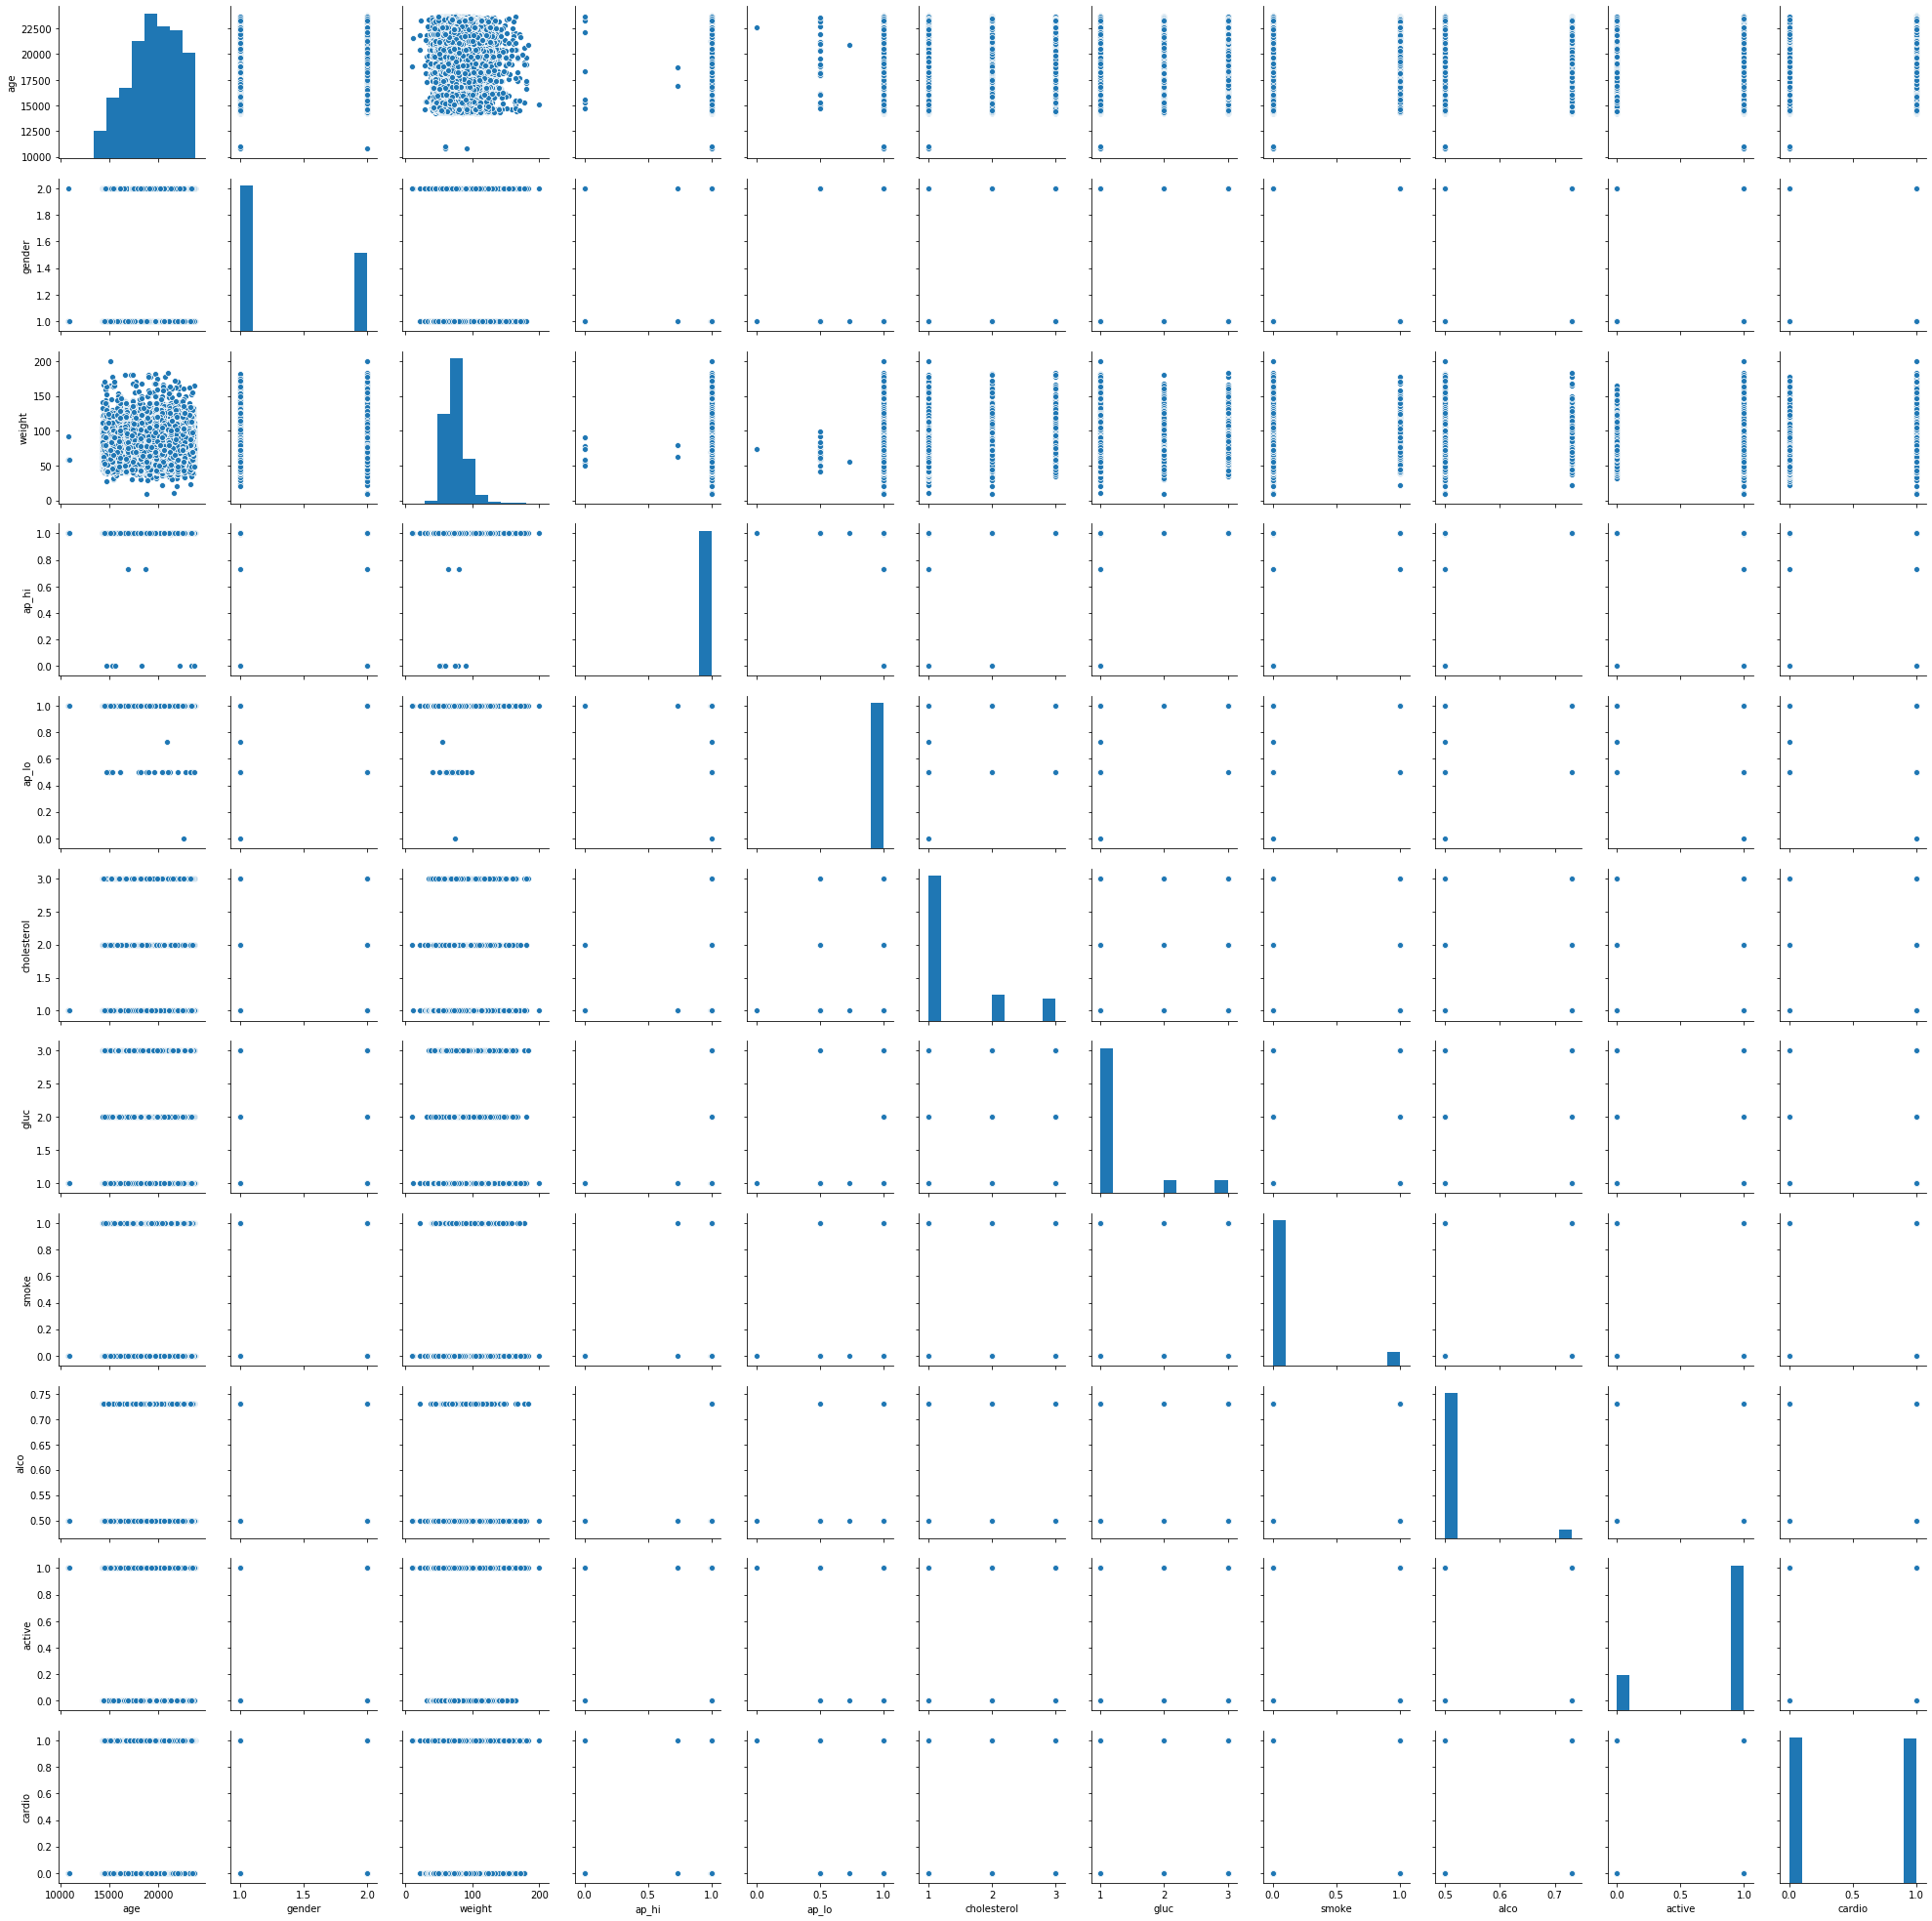

In [37]:
#Lets Check the pairplot using seaborn Library
import seaborn as sns
sns.pairplot(data)
plt.show()

### Plotting Boxplot through Iteration

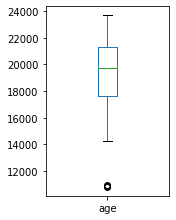

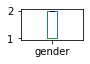

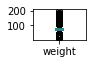

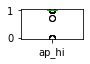

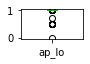

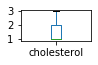

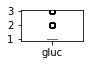

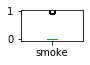

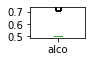

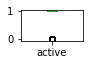

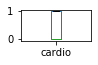

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,15))
for i,col in enumerate(list(data.columns.values)):
    plt.subplot(5,5,i+1)
    data.boxplot(col)
    plt.grid()
    plt.tight_layout()
    plt.show()

### LinePlot

In [39]:
data.columns

Index(['age', 'gender', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

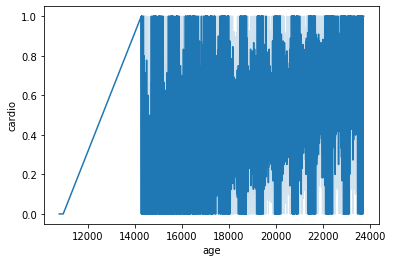

In [34]:
#Lets check how age is changing with respect to cardio
sns.lineplot(data["age"],data["cardio"])
plt.show()

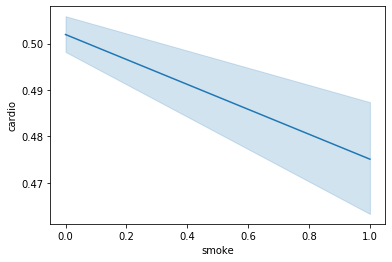

In [40]:
#Lets check how smoke is changing with respect to cardio
sns.lineplot(data["smoke"],data["cardio"])
plt.show()

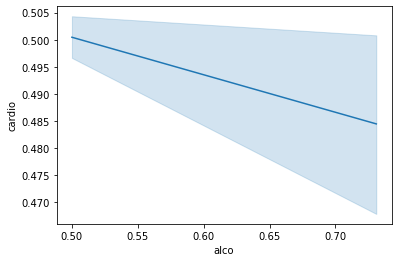

In [41]:
#Lets check how achohol is changing with respect to cardio
sns.lineplot(data["alco"],data["cardio"])
plt.show()

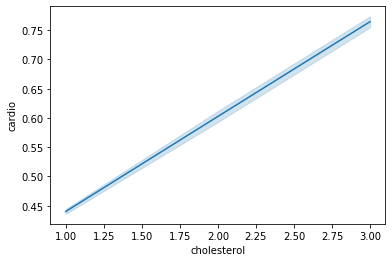

In [42]:
#Lets check how cholesterol is changing with respect to cardio
sns.lineplot(data["cholesterol"],data["cardio"])
plt.show()

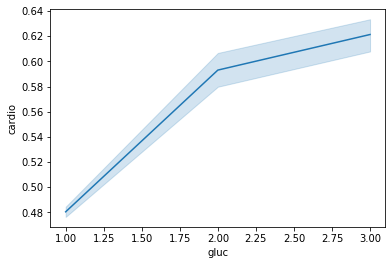

In [43]:
#Lets check how glucose is changing with respect to cardio
sns.lineplot(data["gluc"],data["cardio"])
plt.show()

### Plotting Data using Scatter Plot

In [44]:
data.columns

Index(['age', 'gender', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

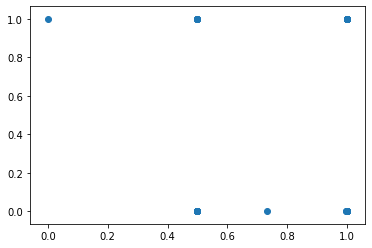

In [45]:
plt.scatter(data['ap_lo'],data['cardio'])

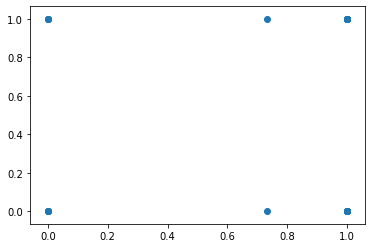

In [46]:
plt.scatter(data['ap_hi'],data['cardio'])

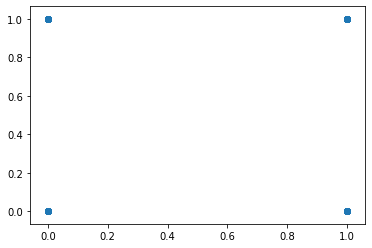

In [47]:
plt.scatter(data['smoke'],data['cardio'])

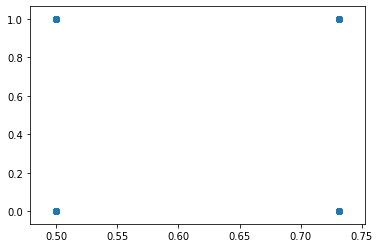

In [48]:
plt.scatter(data['alco'],data['cardio'])

#### Column Plot

In [49]:
collist = data.columns.values
ncols=12
nrows=10

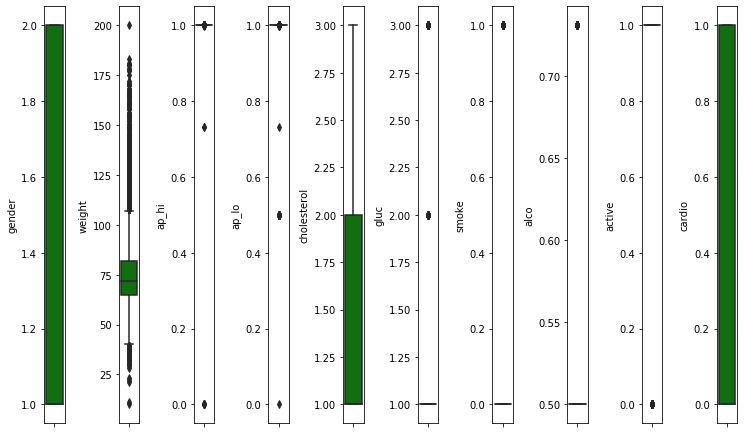

In [50]:
plt.figure(figsize=(ncols,5*ncols))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncols,i+1)
    sns.boxplot(data[collist[i]],color='green',orient='v')
    plt.tight_layout()

#### Separating X and Y Variable

In [51]:
data

,age,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,22469,1,69.0,1.0,1.0,2,2,0,0.500000,1,0
1,14648,1,71.0,1.0,1.0,1,1,0,0.500000,1,1
2,21901,1,70.0,1.0,1.0,1,1,0,0.500000,1,0
3,14549,2,85.0,1.0,1.0,1,1,1,0.731059,1,0
4,23393,1,62.0,1.0,1.0,1,1,0,0.500000,1,0
...,...,...,...,...,...,...,...,...,...,...,...
69296,19240,2,76.0,1.0,1.0,1,1,1,0.500000,1,0
69297,22601,1,126.0,1.0,1.0,2,2,0,0.500000,1,1
69298,19066,2,105.0,1.0,1.0,3,1,0,0.731059,0,1
69299,22431,1,72.0,1.0,1.0,1,2,0,0.500000,0,1


In [52]:
X = data.drop("cardio", axis=1)

In [53]:
X

,age,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,22469,1,69.0,1.0,1.0,2,2,0,0.500000,1
1,14648,1,71.0,1.0,1.0,1,1,0,0.500000,1
2,21901,1,70.0,1.0,1.0,1,1,0,0.500000,1
3,14549,2,85.0,1.0,1.0,1,1,1,0.731059,1
4,23393,1,62.0,1.0,1.0,1,1,0,0.500000,1
...,...,...,...,...,...,...,...,...,...,...
69296,19240,2,76.0,1.0,1.0,1,1,1,0.500000,1
69297,22601,1,126.0,1.0,1.0,2,2,0,0.500000,1
69298,19066,2,105.0,1.0,1.0,3,1,0,0.731059,0
69299,22431,1,72.0,1.0,1.0,1,2,0,0.500000,0


In [54]:
Y = data["cardio"]
Y

0        0
1        1
2        0
3        0
4        0
        ..
69296    0
69297    1
69298    1
69299    1
69300    0
Name: cardio, Length: 69301, dtype: int64

In [55]:
Y.shape

(69301,)

In [56]:
Y = Y.values.reshape(-1,1)

In [57]:
Y

array([[0],
       [1],
       [0],
       ...,
       [1],
       [1],
       [0]], dtype=int64)

In [58]:
Y.shape

(69301, 1)

In [59]:
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=.22,random_state=39)

In [60]:
train_X.shape

(54054, 10)

In [61]:
test_X.shape

(15247, 10)

In [62]:
train_Y.shape

(54054, 1)

In [63]:
test_Y.shape

(15247, 1)

In [64]:
data.dtypes

age              int64
gender           int64
weight         float64
ap_hi          float64
ap_lo          float64
cholesterol      int64
gluc             int64
smoke            int64
alco           float64
active           int64
cardio           int64
dtype: object

#### Applying Logistic Regression

In [65]:
lg=LogisticRegression()

In [66]:
train_X.fillna(train_X.mean())

,age,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
46176,20294,1,63.0,1.0,1.0,1,1,0,0.5,0
45338,19656,1,98.0,1.0,1.0,3,1,0,0.5,1
21838,22361,1,70.0,1.0,1.0,1,2,0,0.5,1
8325,21128,2,70.0,1.0,1.0,1,1,0,0.5,1
23530,22605,2,103.0,1.0,1.0,2,2,0,0.5,1
...,...,...,...,...,...,...,...,...,...,...
35963,18032,1,70.0,1.0,1.0,2,1,0,0.5,1
43235,21316,1,85.0,1.0,1.0,3,1,0,0.5,0
31302,19813,1,66.0,1.0,1.0,1,1,0,0.5,1
33856,21943,2,80.0,1.0,1.0,2,2,0,0.5,0


In [67]:
data

,age,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,22469,1,69.0,1.0,1.0,2,2,0,0.500000,1,0
1,14648,1,71.0,1.0,1.0,1,1,0,0.500000,1,1
2,21901,1,70.0,1.0,1.0,1,1,0,0.500000,1,0
3,14549,2,85.0,1.0,1.0,1,1,1,0.731059,1,0
4,23393,1,62.0,1.0,1.0,1,1,0,0.500000,1,0
...,...,...,...,...,...,...,...,...,...,...,...
69296,19240,2,76.0,1.0,1.0,1,1,1,0.500000,1,0
69297,22601,1,126.0,1.0,1.0,2,2,0,0.500000,1,1
69298,19066,2,105.0,1.0,1.0,3,1,0,0.731059,0,1
69299,22431,1,72.0,1.0,1.0,1,2,0,0.500000,0,1


In [68]:
import pandas as pd

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [69]:
np.all(np.isfinite(data))

True

In [70]:
lg.fit(train_X,train_Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
pred=lg.predict(test_X)
print(pred)

[1 0 0 ... 1 1 0]


In [72]:
print("accuracy score:",accuracy_score(pred,test_Y))

accuracy score: 0.6455696202531646


In [73]:
print(confusion_matrix(test_Y,pred))

[[5121 2462]
 [2942 4722]]


In [74]:
print(classification_report(test_Y,pred))

              precision    recall  f1-score   support

           0       0.64      0.68      0.65      7583
           1       0.66      0.62      0.64      7664

    accuracy                           0.65     15247
   macro avg       0.65      0.65      0.65     15247
weighted avg       0.65      0.65      0.65     15247



### Using Cross Validation to Check Overfitting,Underfitting and Predict the Result

In [75]:
from sklearn.model_selection import cross_val_score
accuracycvlg1 = cross_val_score(lg,X,Y,cv=10,scoring='accuracy').mean()
print(accuracycvlg1)

0.6381149880839289


In [76]:
from sklearn.model_selection import cross_val_score
accuracycvlg2 = cross_val_score(lg,X,Y,cv=15,scoring='accuracy').mean()
print(accuracycvlg2)

0.6380282631593455


### Boost the Dataset by AdaBoost and GradiantBoost

In [77]:
from sklearn.ensemble import AdaBoostClassifier
modelad = AdaBoostClassifier()
modelad.fit(train_X,train_Y)
print(modelad.score(train_X,train_Y))
abpred=modelad.predict(test_X)
print(abpred)
modelad.score(test_X,test_Y)

0.643042143042143
[1 0 0 ... 1 1 0]


0.6420935265953959

In [78]:
from sklearn.ensemble import GradientBoostingClassifier
modelgb=GradientBoostingClassifier()
modelgb.fit(train_X,train_Y)
print(modelgb.score(train_X,train_Y))
abpred=modelgb.predict(test_X)
print(abpred)
modelgb.score(test_X,test_Y)

0.6475561475561475
[1 0 0 ... 1 1 0]


0.6461599003082573

### Boosting though GradientBoost Regressor By using Parameters

In [79]:
from sklearn import ensemble
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
modelgbr = ensemble.GradientBoostingRegressor(**params)

modelgbr.fit(train_X, train_Y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [80]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = modelgbr.score(train_X,train_Y)
print("model_Score:",model_score)

print('R2 sq: ',model_score)
y_predictedgbr = modelgbr.predict(test_X)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(test_Y, y_predictedgbr))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(test_Y, y_predictedgbr))

model_Score: 0.13174802278563247
R2 sq:  0.13174802278563247
Mean squared error: 0.22
Test Variance score: 0.13


### Lets Visualize the Goodness of the Prediction

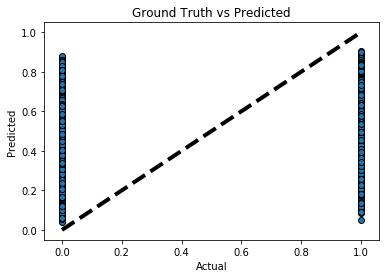

In [81]:
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(test_Y, y_predictedgbr, edgecolors=(0, 0, 0))
ax.plot([test_Y.min(), test_Y.max()], [test_Y.min(), test_Y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

### Prediction Using Naive Bayes Algo

In [82]:
mb=MultinomialNB()
mb.fit(train_X,train_Y)


predmb = mb.predict(test_X)
print(accuracy_score(test_Y,predmb))
print(confusion_matrix(test_Y,predmb))
print(classification_report(test_Y,predmb))

0.5570276119892438
[[4616 2967]
 [3787 3877]]
              precision    recall  f1-score   support

           0       0.55      0.61      0.58      7583
           1       0.57      0.51      0.53      7664

    accuracy                           0.56     15247
   macro avg       0.56      0.56      0.56     15247
weighted avg       0.56      0.56      0.56     15247



### Prediction Using DecisionTreeClassifier

In [83]:
dtc=DecisionTreeClassifier()
dtc.fit(train_X,train_Y)
dtc.score(train_X,train_Y)
preddtc=dtc.predict(test_X)
print(accuracy_score(test_Y,preddtc))
print(confusion_matrix(test_Y,preddtc))
print(classification_report(test_Y,preddtc))

0.5569620253164557
[[4254 3329]
 [3426 4238]]
              precision    recall  f1-score   support

           0       0.55      0.56      0.56      7583
           1       0.56      0.55      0.56      7664

    accuracy                           0.56     15247
   macro avg       0.56      0.56      0.56     15247
weighted avg       0.56      0.56      0.56     15247



### DecisionTreeClassifier by using Crossval Score

In [84]:
dt=DecisionTreeClassifier(criterion='gini')
score=cross_val_score(dt,X,Y,cv=5,scoring='f1_macro')

print('F1-score:',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred = cross_val_predict(dt,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)

conf_mat = confusion_matrix(Y,y_pred)
conf_mat

F1-score: [0.56322352 0.57001783 0.5716409  0.56083466 0.55962752]
Mean Scores 0.5650688862483783
Standard Deviation 0.004870848764878663
Y Prediction values
[0 0 0 ... 1 0 0]


array([[19862, 14817],
       [15287, 19335]], dtype=int64)

### Using GridSearchCV for DecisionTreeClassifier

In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
dt_grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
dt_grid_search_cv.fit(train_X, train_Y)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:   52.2s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16

In [86]:
# inspection the best parameters found by GridSearchCV in the best_params_ attribute, and the best estimator in the best_estimator_ attribute:

# print best parameter after tuning 
print(dt_grid_search_cv.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(dt_grid_search_cv.best_estimator_)

{'max_leaf_nodes': 26, 'min_samples_split': 2}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=26,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')


In [87]:
# Re-run predictions and see classification report 

grid_predictions = dt_grid_search_cv.predict(test_X) 
  
# print classification report 
print(classification_report(test_Y, grid_predictions)) 

              precision    recall  f1-score   support

           0       0.63      0.64      0.64      7583
           1       0.64      0.63      0.64      7664

    accuracy                           0.64     15247
   macro avg       0.64      0.64      0.64     15247
weighted avg       0.64      0.64      0.64     15247



### Boost Decision Tree Classifier

In [88]:
from sklearn.ensemble import AdaBoostClassifier

dtbclassifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
)
dtbclassifier.fit(train_X, train_Y)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [89]:
predictions = dtbclassifier.predict(test_X)
predictions

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [90]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_Y,predictions))

0.642946153341641


In [91]:
confusion_matrix(test_Y, predictions)

array([[5140, 2443],
       [3001, 4663]], dtype=int64)

### Prediction Using KNN Nearest Neighbor

In [92]:
#k = 10
knn = KNeighborsClassifier()
knn.fit(train_X,train_Y)
knn.score(train_X,train_Y)
predknn=knn.predict(test_X)
print(accuracy_score(test_Y,predknn))
print(confusion_matrix(test_Y,predknn))
print(classification_report(test_Y,predknn))

0.5764412671345183
[[4449 3134]
 [3324 4340]]
              precision    recall  f1-score   support

           0       0.57      0.59      0.58      7583
           1       0.58      0.57      0.57      7664

    accuracy                           0.58     15247
   macro avg       0.58      0.58      0.58     15247
weighted avg       0.58      0.58      0.58     15247



### KNN Nearest Neighbor by using Crossval Score 

In [93]:
# k=10

kn=KNeighborsClassifier()

score=cross_val_score(kn,X,Y,cv=10,scoring='accuracy')

print('Accuracy score:',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred = cross_val_predict(kn,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)

print("y_pred.shape",y_pred.shape)

conf_mat = confusion_matrix(Y,y_pred)
conf_mat

Accuracy score: [0.57105757 0.56283365 0.57041847 0.59004329 0.57691198 0.57806638
 0.57979798 0.57041847 0.58542569 0.5657382 ]
Mean Scores 0.5750711666232089
Standard Deviation 0.008138479367379789
Y Prediction values
[1 0 1 ... 1 0 1]
y_pred.shape (69301,)


array([[20379, 14300],
       [15065, 19557]], dtype=int64)

### Use GridSearchCV for KNN Nearest Neighbor

In [94]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [95]:
# search for an optimal value of K for KNN

# list of integers 1 to 30
# integers we want to try
k_range = range(1, 31)

# list of scores from k_range
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn1 = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn1, train_X, train_Y, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)

[0.5489694329812037, 0.5436048245695069, 0.5634005636018853, 0.5610877258023946, 0.5725576896040206, 0.5719469144629455, 0.5802532983542361, 0.5793469665426052, 0.5844712314619083, 0.5823995209786834, 0.5904838540012557, 0.5883561566868758, 0.5935731442149519, 0.5921487392886062, 0.5948312933833101, 0.5958303443636013, 0.5975321503168995, 0.5981613173116783, 0.6001590804464835, 0.5989565483946848, 0.6011767252414443, 0.6001407193676032, 0.602286620214844, 0.601787048528265, 0.602915431266878, 0.6020460268760262, 0.6035074825124356, 0.6040810323792554, 0.6049874463698102, 0.6051354027011592]


In [96]:
# define the parameter values that should be searched
# for python 2, k_range = range(1, 31)
knn1 = KNeighborsClassifier(n_neighbors=k)
k_range = list(range(1, 31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [97]:
# create a parameter grid: map the parameter names to the values that should be searched
# simply a python dictionary
# key: parameter name
# value: list of values that should be searched for that parameter
# single key-value pair for param_grid
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [98]:
# instantiate the grid
gridknn = GridSearchCV(knn1, param_grid, cv=10, scoring='accuracy')

In [99]:
# fit the grid with data
gridknn.fit(train_X, train_Y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=30, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [100]:
# inspection the best parameters found by GridSearchCV in the best_params_ attribute, and the best estimator in the best_estimator_ attribute:

# print best parameter after tuning 
print(gridknn.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(gridknn.best_estimator_)

{'n_neighbors': 30}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')


In [101]:
# Re-run predictions and see classification report 

grid_predictions = gridknn.predict(test_X) 
  
# print classification report 
print(classification_report(test_Y, grid_predictions))

              precision    recall  f1-score   support

           0       0.60      0.65      0.63      7583
           1       0.63      0.57      0.60      7664

    accuracy                           0.61     15247
   macro avg       0.61      0.61      0.61     15247
weighted avg       0.61      0.61      0.61     15247



#### Bagging of KNN Nearest Neighbor 

In [102]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
baggingknn = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)

In [103]:
baggingknn.fit(train_X, train_Y)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=5, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=0.5,
                  max_samples=0.5, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [104]:
predictions = baggingknn.predict(test_X)
predictions

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [105]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_Y,predictions))

0.5881812815635863


In [106]:
confusion_matrix(test_Y, predictions)

array([[4235, 3348],
       [2931, 4733]], dtype=int64)

### Prediction Using RandomForest Classification

In [107]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(train_X,train_Y)
rf.score(train_X,train_Y)
predf=rf.predict(test_X)
print(accuracy_score(test_Y,predf))
print(confusion_matrix(test_Y,predf))
print(classification_report(test_Y,predf))

0.579851774119499
[[4627 2956]
 [3450 4214]]
              precision    recall  f1-score   support

           0       0.57      0.61      0.59      7583
           1       0.59      0.55      0.57      7664

    accuracy                           0.58     15247
   macro avg       0.58      0.58      0.58     15247
weighted avg       0.58      0.58      0.58     15247



### RandomForestClassifier Using Cross_Val_Score

In [108]:
# k=10

rf1=RandomForestClassifier()

score=cross_val_score(rf1,X,Y,cv=10,scoring='accuracy')

print('Accuracy score:',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred = cross_val_predict(rf1,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)

print("y_pred.shape",y_pred.shape)

conf_mat = confusion_matrix(Y,y_pred)
conf_mat

Accuracy score: [0.59067956 0.56846054 0.58398268 0.59076479 0.57806638 0.58831169
 0.57950938 0.57864358 0.58730159 0.58320104]
Mean Scores 0.5828921220915423
Standard Deviation 0.006586154543346562
Y Prediction values
[1 0 1 ... 1 1 0]
y_pred.shape (69301,)


array([[21285, 13394],
       [15592, 19030]], dtype=int64)

#### Bagging of Random Forest Classifier 

In [109]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
baggingrf = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)

In [110]:
baggingrf.fit(train_X, train_Y)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=5, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=0.5,
                  max_samples=0.5, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [111]:
predictionsrf = baggingrf.predict(test_X)
predictionsrf

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [112]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_Y,predictionsrf))

0.6105463369843248


In [113]:
confusion_matrix(test_Y, predictionsrf)

array([[4870, 2713],
       [3225, 4439]], dtype=int64)

#### Prediction Using ExtraTreeClassifier

In [114]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
X, Y = make_classification(n_features=10, random_state=0)
clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
clf.fit(X, Y)
predf=clf.predict(test_X)
print(accuracy_score(test_Y,predf))
print(confusion_matrix(test_Y,predf))
print(classification_report(test_Y,predf))

0.5026562602479177
[[   0 7583]
 [   0 7664]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7583
           1       0.50      1.00      0.67      7664

    accuracy                           0.50     15247
   macro avg       0.25      0.50      0.33     15247
weighted avg       0.25      0.50      0.34     15247



#### Prediction Using CalibratedClassifier

In [115]:
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier

calibrated_forest = CalibratedClassifierCV(base_estimator=RandomForestClassifier(n_estimators=10))
param_grid = {'base_estimator__max_depth': [2, 4, 6, 8]}
search = GridSearchCV(calibrated_forest, param_grid, cv=5)
search.fit(X, Y)
GridSearchCV(cv=5,
             estimator=CalibratedClassifierCV(...),
             param_grid={'base_estimator__max_depth': [2, 4, 6, 8]})

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=CalibratedClassifierCV(base_estimator=Ellipsis,
                                              cv='warn', method='sigmoid'),
             iid='warn', n_jobs=None,
             param_grid={'base_estimator__max_depth': [2, 4, 6, 8]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [118]:
search = search.fit(train_X, train_Y)

In [119]:
# inspection the best parameters found by GridSearchCV in the best_params_ attribute, and the best estimator in the best_estimator_ attribute:

# print best parameter after tuning 
print(search.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(search.best_estimator_)

{'base_estimator__max_depth': 8}
CalibratedClassifierCV(base_estimator=RandomForestClassifier(bootstrap=True,
                                                             class_weight=None,
                                                             criterion='gini',
                                                             max_depth=8,
                                                             max_features='auto',
                                                             max_leaf_nodes=None,
                                                             min_impurity_decrease=0.0,
                                                             min_impurity_split=None,
                                                             min_samples_leaf=1,
                                                             min_samples_split=2,
                                                             min_weight_fraction_leaf=0.0,
                                                             n_es

In [121]:
# Re-run predictions and see classification report 

search_predictions = search.predict(test_X) 
  
# print classification report 
print(classification_report(test_Y, search_predictions)) 

              precision    recall  f1-score   support

           0       0.63      0.66      0.65      7583
           1       0.65      0.62      0.64      7664

    accuracy                           0.64     15247
   macro avg       0.64      0.64      0.64     15247
weighted avg       0.64      0.64      0.64     15247



#### Prediction Using Pipeline

In [123]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
pipe = Pipeline([('select', SelectKBest()),('model', calibrated_forest)])
param_grid = {'select__k': [1, 2],'model__base_estimator__max_depth': [2, 4, 6, 8]}
search1 = GridSearchCV(pipe, param_grid, cv=5).fit(train_X, train_Y)

In [124]:
search1 = search1.fit(train_X, train_Y)

In [125]:
# inspection the best parameters found by GridSearchCV in the best_params_ attribute, and the best estimator in the best_estimator_ attribute:

# print best parameter after tuning 
print(search.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(search.best_estimator_)

{'model__base_estimator__max_depth': 2, 'select__k': 1}
Pipeline(memory=None,
         steps=[('select',
                 SelectKBest(k=1,
                             score_func=<function f_classif at 0x00000167016A9708>)),
                ('model',
                 CalibratedClassifierCV(base_estimator=RandomForestClassifier(bootstrap=True,
                                                                              class_weight=None,
                                                                              criterion='gini',
                                                                              max_depth=2,
                                                                              max_features='auto',
                                                                              max_leaf_nodes=None,
                                                                              min_impurity_decrease=0.0,
                                                                    

In [127]:
# Re-run predictions and see classification report 

grid_predictions = search1.predict(test_X) 
  
# print classification report 
print(classification_report(test_Y, grid_predictions)) 

              precision    recall  f1-score   support

           0       0.63      0.57      0.60      7583
           1       0.61      0.68      0.64      7664

    accuracy                           0.62     15247
   macro avg       0.62      0.62      0.62     15247
weighted avg       0.62      0.62      0.62     15247



#### NOTE::Since Many models gives same level of accuracy, I am choosing CalibratedClassifier(64%) and I am choosing this model

In [128]:
#Lets save the above model
from sklearn.externals import joblib

#Save the model as pickle in a file
joblib.dump(search,'cardio.pkl')

['cardio.pkl']